### Unemployment analysis with Python

#### 1.Problem Statement
###### Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19. So, the analysis intends to shed light on the socio-economic consequences of the pandemic on India's workforce and labor market.

###### This dataset aids in comprehending the unemployment dynamics across India's states during the COVID-19 crisis. It offers valuable insights into how the unemployment rate, employment figures, and labor participation rates have been impacted across different regions in the country.

#### Preparing The Environment


In [62]:
#Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [63]:
unemp = pd.read_csv("Unemployment in India.csv")

#### Data Exploring
Using exploratory data analysis (EDA), we are getting fimiliar with our dataset by knowing some informations and aggregations.

In [64]:
#Whole dataset information
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [65]:
#Printing random 5 rows as an overview
unemp.sample(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
196,Maharashtra,31-12-2019,Monthly,3.03,26357625.0,50.98,Rural
224,Odisha,31-12-2019,Monthly,4.67,11345069.0,40.91,Rural
586,Maharashtra,30-04-2020,Monthly,14.99,12674451.0,30.86,Urban
446,Delhi,31-10-2019,Monthly,12.41,6030363.0,45.78,Urban
629,Puducherry,30-06-2020,Monthly,4.55,234926.0,29.73,Urban


In [66]:
# How many null values in each feature?
unemp.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [67]:
#Generating some discriptive statistics for the numeric features
unemp.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [68]:
unemp['Area'].value_counts()

Urban    381
Rural    359
Name: Area, dtype: int64

In [69]:
#Observations in different regions aren't with the same frequency
unemp['Region'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: Region, dtype: int64

In [70]:
unemp[' Date'].value_counts()

 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-05-2020    51
 30-06-2020    50
Name:  Date, dtype: int64

In [71]:
#Important note: there's a typo in frequency values
unemp[' Frequency'].value_counts()

Monthly     381
 Monthly    359
Name:  Frequency, dtype: int64

In [72]:
#Unemployment rate and people employed are negatively correlated (weak correlation)
unemp[' Estimated Employed'].corr(unemp[' Estimated Unemployment Rate (%)'])

-0.2228763995221479

#### Data Cleaning
Transforming row data into usable formats to ensure data is accurate.

In [73]:
# Dropping null values as it is completely random and doesn't depend on other variables
# As the whole data is recorded monthly, the frequency month can be considered redundant data. So it will be dropped
df2 = unemp.dropna().drop(columns=[' Frequency'])

df2

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...
749,West Bengal,29-02-2020,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,15.22,9240903.0,40.67,Urban


##### Renaming Details:
The dataset provides insights into the unemployment scenario across different Indian states:

**region**: The states within India. **date**: The date when the unemployment rate was recorded. **est_unemp_perc**: The percentage of individuals unemployed in each state of India. **est_mil_emp**: The count of millions currently employed. **est_labour_perc**: The proportion of the working population (age group: 16-64 years) participating in the labor force, either employed or actively seeking employment.

In [74]:
# 1. Renaming columns for easier access
# 2. Reset the index
# 3. rounding estimated employed column for a better visualizing
df3 = df2.rename(columns={"Region" : "region", ' Date' : 'date', ' Estimated Unemployment Rate (%)' : 'est_unemp_perc', ' Estimated Employed' : 'est_mil_emp',
                          ' Estimated Labour Participation Rate (%)' : 'est_labour_perc', 'Area' : 'area'}).reset_index(drop = True)
df3['est_mil_emp'] = (df3['est_mil_emp'] / 1000000).round(2)
df3

,region,date,est_unemp_perc,est_mil_emp,est_labour_perc,area
0,Andhra Pradesh,31-05-2019,3.65,12.00,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11.76,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12.09,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12.29,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12.26,44.68,Rural
...,...,...,...,...,...,...
735,West Bengal,29-02-2020,7.55,10.87,44.09,Urban
736,West Bengal,31-03-2020,6.67,10.81,43.34,Urban
737,West Bengal,30-04-2020,15.63,9.30,41.20,Urban
738,West Bengal,31-05-2020,15.22,9.24,40.67,Urban


In [75]:
# Ensuring that there isn't any duplicates
df3.duplicated().sum()

0

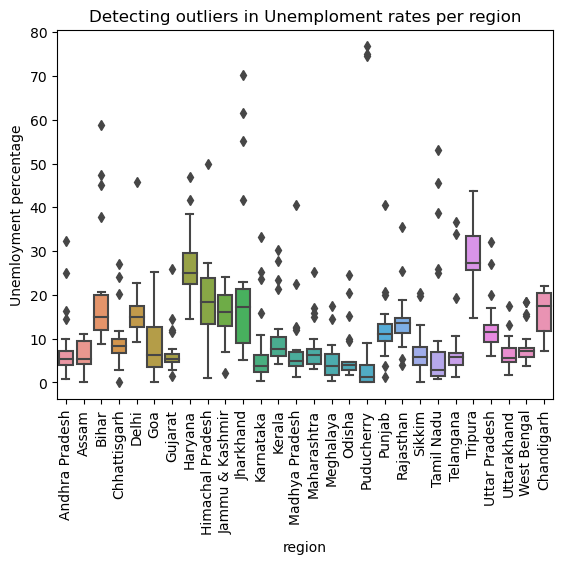

In [76]:
#Searching for outliers
sns.boxplot(data= df3, x='region', y='est_unemp_perc')
plt.title('Detecting outliers in Unemploment rates per region')
plt.ylabel('Unemloyment percentage')
plt.xticks(rotation = 90)
plt.show()

There's many outliers but we can't remove them as they still represent valid information.

#### Data visualization
This is the stage where we will analyze the data and get some answers.

Let's see the change in percentage of particiation rate per month and see if we can get another insights

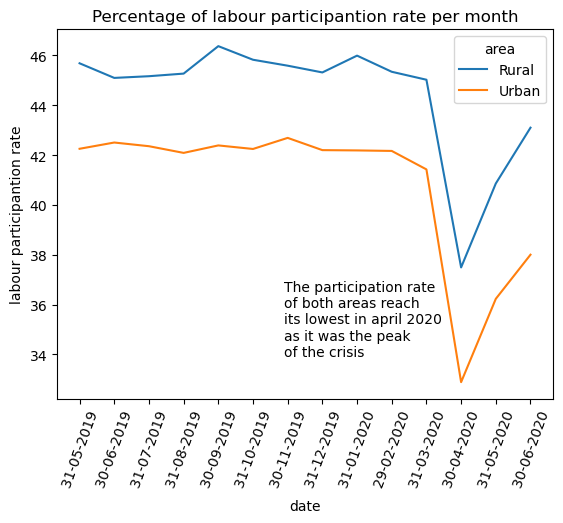

In [77]:
sns.lineplot(data=df3, x='date', y='est_labour_perc', hue='area', errorbar= None)
plt.title('Percentage of labour participantion rate per month')
plt.ylabel('labour participantion rate')
plt.xticks(rotation= 70)
plt.figtext(x= 0.48, y= 0.2 , s= 'The participation rate\nof both areas reach\nits lowest in april 2020\nas it was the peak\nof the crisis')
plt.show()

Discovering the differences in unemployment percentages among regions should tell us the most affected region of the Covid-19 crisis.

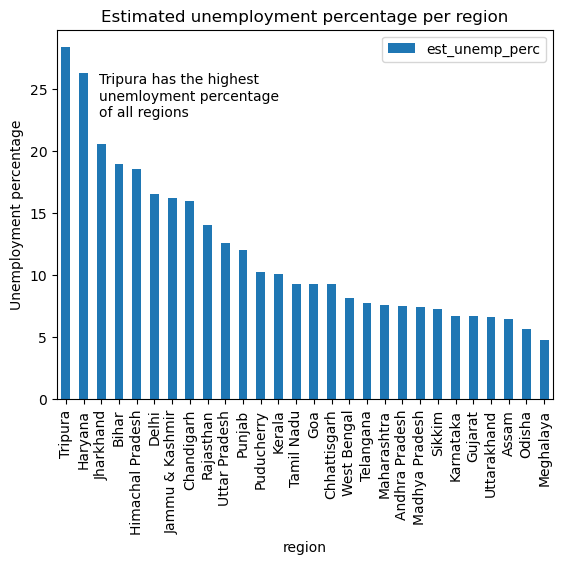

In [78]:
df5 = df3.groupby('region')[['est_unemp_perc']].mean().sort_values(by='est_unemp_perc',ascending= False)
df5.plot(kind='bar')
plt.title('Estimated unemployment percentage per region')
plt.ylabel('Unemployment percentage')
plt.xticks(rotation= 90)
plt.figtext(x= 0.19, y= 0.7, s= 'Tripura has the highest\nunemloyment percentage\nof all regions')
plt.show()

The average employed per region will tell us if there a significant difference in employees among states as well as the regions with the highest and lowest number of employees

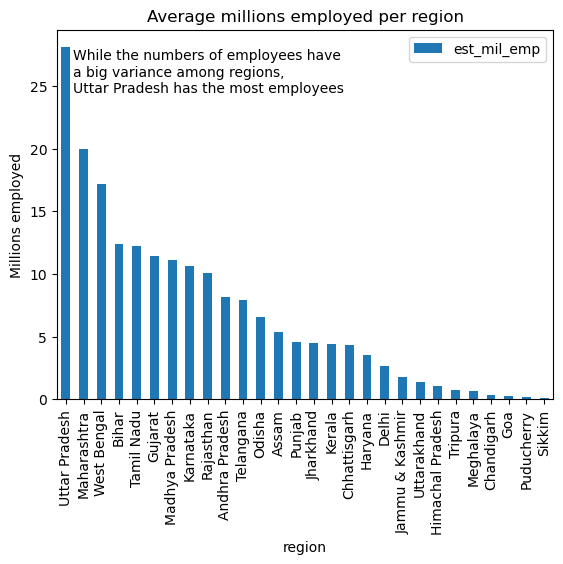

In [79]:
df4 = df3.groupby('region')[['est_mil_emp']].mean().sort_values(by='est_mil_emp',ascending= False)
df4.plot(kind='bar')
plt.title('Average millions employed per region')
plt.ylabel('Millions employed')
plt.figtext(x=0.15, y=0.75, s='While the numbers of employees have\na big variance among regions,\nUttar Pradesh has the most employees')
plt.show()

Which area has a lower unemployment rate

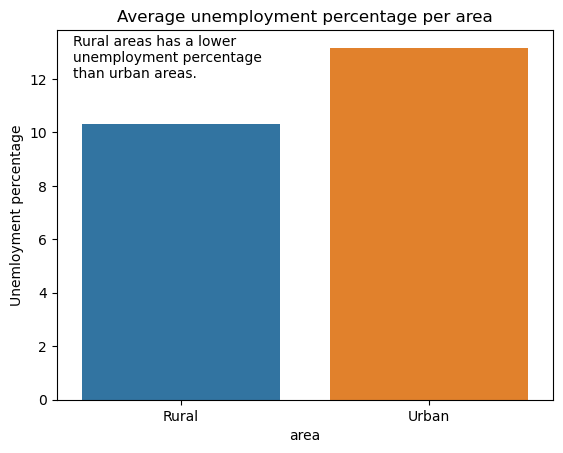

In [80]:
sns.barplot(df3, x='area', y= 'est_unemp_perc', errorbar=None)
plt.figtext(x= 0.15, y= 0.78 , s= 'Rural areas has a lower\nunemployment percentage\nthan urban areas.')
plt.title("Average unemployment percentage per area")
plt.ylabel('Unemloyment percentage')
plt.show()

Which state the crisis had affected mostly

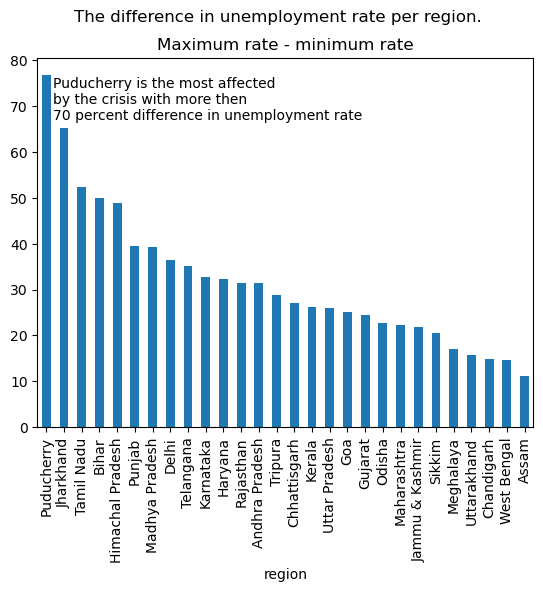

In [81]:
ax= df3.groupby('region')['est_unemp_perc'].agg(lambda x: max(x) - min(x)).sort_values(ascending=False).plot(kind='bar')
plt.suptitle('The difference in unemployment rate per region.')
plt.title('Maximum rate - minimum rate')
plt.figtext(x= 0.15, y= 0.75, s='Puducherry is the most affected\nby the crisis with more then\n70 percent difference in unemployment rate ')
plt.show()

#### Conclusion
After analyzing the dataset we gained some insights that may give us a brief about the effects of Covid-19 on different states of India. Firstly, the peak of the crisis in april 2020 caused a huge decrease in the labour participation rate as it had reached its lowest during that period. Secondly, from the visualizations we saw that urban areas had a higher unemployment rate than rural areas. Although there's a states like Meghalaya that had the least employees, it has the least unemployment rate too. While other states like Puducherry had been affected badly from the crisis.